## _30 Days Python Bootcamp @ BEST-ENLIST_

### _Author: SANDHYA S_

### _Date: 06 July '21_

## _Task: Programming Exercise_
---

## _1. Read a jpeg image and print the image file_

In [1]:
from PIL import Image, ImageFilter
image = Image.open('image.jpg')

In [2]:
# Image format
print(image.format)

JPEG


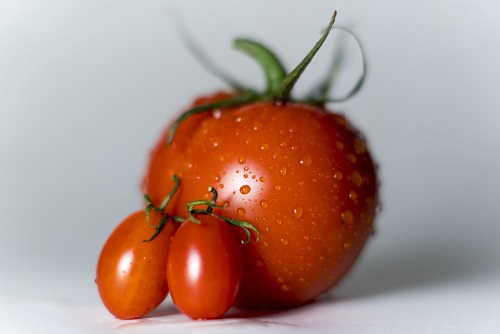

In [3]:
# displaying image
image

## _2. Merge two pdf files using python script_

In [4]:
import PyPDF2
def pdf_details(pdf):
    with open(pdf,'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        print(pdf)
        print('No. of pages:', reader.numPages)

In [5]:
# Merging two pdfs
def pdfmerge(pdf_list):
    for pdf in pdf_list:
        pdf_details(pdf)
    filename = 'GINGER-THE-GIRAFFE.pdf'
    merger = PyPDF2.PdfFileMerger()
    for pdf in pdf_list:
        merger.append(pdf)
    print('\nPdf files merged Successfully!')
    merger.write(filename)
    pdf_details(filename)

In [6]:
lst = ['GINGER-THE-GIRAFFE_1.pdf', 'GINGER-THE-GIRAFFE_2.pdf']
pdfmerge(lst)

GINGER-THE-GIRAFFE_1.pdf
No. of pages: 7
GINGER-THE-GIRAFFE_2.pdf
No. of pages: 10

Pdf files merged Successfully!
GINGER-THE-GIRAFFE.pdf
No. of pages: 17


## _3. Scrape a website and store the data into DB._

In [7]:
from requests import get
from bs4 import BeautifulSoup
import re
url = 'https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=3'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
names = []
years = []
ratings = []
metascores = []
votes = []

for container in movie_containers:
    if container.find('div', class_ = 'ratings-metascore') is not None:

        name = container.h3.a.text
        names.append(name)

        year = container.h3.find('span', class_ = 'lister-item-year').text
        pattern = '([0-9]{4})'
        match = re.findall(pattern, year)
        years.append(match[0])

        rating = float(container.strong.text)
        ratings.append(rating)
        
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

- ### _Storing extracted data as a DataFrame_

In [8]:
import pandas as pd
movie_df = pd.DataFrame({'movie': names,
                         'year': years,
                         'rating': ratings,
                         'metascore': metascores,
                         'votes': votes})
movie_df.head()

,movie,year,rating,metascore,votes
0,Logan,2017,8.1,77,672139
1,Thor: Ragnarok,2017,7.9,74,623189
2,Wonder Woman,2017,7.4,76,598102
3,Guardians of the Galaxy Vol. 2,2017,7.6,67,593860
4,Dunkirk,2017,7.8,94,579906


- ### _Writing data into database_

In [9]:
import mysql.connector as msq
db = msq.connect(host='localhost', user='root', password='password', database='mydb')
curs = db.cursor(buffered=True)

# Creating table - 'movies'
movie_q = 'CREATE TABLE movies(Name varchar(50), year varchar(4), rating varchar(5),\
         metascore integer(4), votes integer(10))'
curs.execute(movie_q)

In [10]:
# Inserting values into the table
for i, row in movie_df.iterrows():
    sql = 'INSERT INTO movies VALUES (%s, %s, %s, %s, %s)'
    curs.execute(sql, tuple(row))
    db.commit()

In [11]:
# Displaying the data of movie table
curs.execute('SELECT * FROM movies')
movies = curs.fetchall()
print(f'movie, year, rating, metascore, votes\n{"-"*37}')
for movie in movies:
    print(movie)

movie, year, rating, metascore, votes
-------------------------------------
('Logan', '2017', '8.1', 77, 672139)
('Thor: Ragnarok', '2017', '7.9', 74, 623189)
('Wonder Woman', '2017', '7.4', 76, 598102)
('Guardians of the Galaxy Vol. 2', '2017', '7.6', 67, 593860)
('Dunkirk', '2017', '7.8', 94, 579906)
('Star Wars: Episode VIII - The Last Jedi', '2017', '7.0', 84, 579454)
('Spider-Man: Homecoming', '2017', '7.4', 73, 537527)
('Get Out', '2017', '7.7', 85, 514904)
('Blade Runner 2049', '2017', '8.0', 81, 484033)
('It', '2017', '7.3', 69, 476039)
('Baby Driver', '2017', '7.6', 86, 463488)
('Three Billboards Outside Ebbing, Missouri', '2017', '8.1', 88, 454312)
('Justice League', '2017', '6.1', 45, 417500)
('Coco', '2017', '8.4', 81, 414015)
('The Shape of Water', '2017', '7.3', 87, 385088)
('John Wick: Chapter 2', '2017', '7.5', 75, 383398)
('Jumanji: Welcome to the Jungle', '2017', '6.9', 58, 334021)
('Kong: Skull Island', '2017', '6.6', 62, 291720)
('Kingsman: The Golden Circle', '2017

## _4. Write queries to filter the data in db_

In [12]:
# Displaying details of movies having Rating greater than 7
query = 'SELECT * FROM movies WHERE rating > 7'
curs.execute(query)
details = curs.fetchall()
print(f'Movies having Rating greater than 7\n{"-"*35}')
for detail in details:
    print(detail[0])

Movies having Rating greater than 7
-----------------------------------
Logan
Thor: Ragnarok
Wonder Woman
Guardians of the Galaxy Vol. 2
Dunkirk
Spider-Man: Homecoming
Get Out
Blade Runner 2049
It
Baby Driver
Three Billboards Outside Ebbing, Missouri
Coco
The Shape of Water
John Wick: Chapter 2
Beauty and the Beast
Lady Bird
The Greatest Showman
War for the Planet of the Apes
Call Me by Your Name
Wind River
I, Tonya
Darkest Hour
American Made


In [13]:
# Displaying details of movies having metascore less than 50
query = 'SELECT * FROM movies WHERE metascore < 50'
curs.execute(query)
details = curs.fetchall()
print(f'Movies having metascore less than 50\n{"-"*36}')
for detail in details:
    print(detail[0])

Movies having metascore less than 50
------------------------------------
Justice League
Kingsman: The Golden Circle
Pirates of the Caribbean: Dead Men Tell No Tales
The Greatest Showman
The Hitman's Bodyguard
King Arthur: Legend of the Sword
The Mummy
Bright
Baywatch


In [14]:
curs.execute('DROP TABLE movies')
curs.close()
db.close()

---
## _Thank You!_